# Ion Acoustic Waves - Fluid Theory

In this notebook, we use fluid thoery to discuss ion acoustic waves, and compare the theoretical results we obtain with plots made using the PIC code UPIC-ES.

## Theory
$\textbf{Introduction:}$  
We can represent a typical 1d plasma by represent the ions and electrons with maxwellian distributions:

$\begin{equation} 
f_e(v) = \frac{1}{\sqrt{2 \pi \bar{v}_e}} e^{-v^2/2 \bar{v}_e^2} \\
f_i(v) = \frac{1}{\sqrt{2 \pi \bar{v}_i}} e^{-v^2/2 \bar{v}_i^2}
\end{equation}$  

Let's compare the width of the electron distribution to the width of the ion distribution.  To this end, we write  

$\begin{equation}
    \bar{v}_e 
    = \sqrt{\frac{T_e}{m}} \\
    = \sqrt{\frac{T_e}{T_i}} \sqrt{\frac{M}{m}} \sqrt{\frac{T_i}{M}} \\
    = \sqrt{\frac{T_e}{T_i}} \sqrt{\frac{M}{m}} \bar{v}_i \\
    \approx 40 \sqrt{\frac{T_e}{T_i}} \bar{v}_i, \\
\end{equation}$  

where m is the electron mass, M is the ion mass, and in the last line we made the approximation that $\sqrt{\frac{M}{m}} \approx 40$.  So we see that the electron distribution is about 40 times as wide (up to the square root factor) as the ion distribution.  Roughly, the electron distribution is very flat compared to the very narrow ion distribution.  Plot it for yourself in the cell below.  Try playing around with the the thermal velocities, "vbe" and "vbi," and see what effect it has on the distribution functions.  

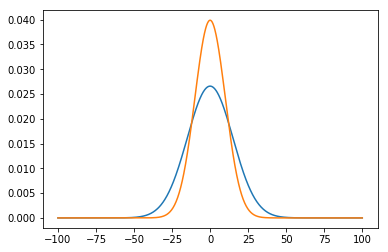

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f_e(v):
    vbe = 15       # electron thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbe**2) * np.exp(-v**2/(2*vbe**2))
    return f

def f_i(v):
    vbi = 10      # ion thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbi**2) * np.exp(-v**2/(2*vbi**2))
    return f

vmax = 100
v = np.linspace(-vmax,vmax,1000)
f_e = f_e(v)
f_i = f_i(v)
plt.plot(v,f_e)
plt.plot(v,f_i)

Try setting vbe = 40, and vbi = 1.  Notice how different the two distribution functions look; the electron distribution is incredibly flat, and the ion distribution is incredibly narrow and sharply peaked.  Because of the huge difference in their thermal velocities, it is possible to excite a wave whose phase velocity, $v_p = \omega / k$, is simultaneously much smaller than the thermal velocity of electrons, and much larger than the thermal velocity of ions.  These conditions give rise to an ion acoustic wave, a type of electrostatic wave that can propogate through a plasma.  

Since $\omega/k << \bar{v}_e$, we can assume the electrons are in the adiabatic regime.  Conversely, since $\omega/k >> \bar{v}_i$, we can assume the ions are in the inertial regime.  Since both are away from the resonant regime then, we can use fluid theory to derive the ion acoustic wave properties.

$\textbf{Electrons Response:}$  
We first consider the adiabatic electrons in the limit $\omega \rightarrow 0$.  Consider the collisionless dynamical equation in 1d:  

$\begin{equation}
    m n_e (\frac{\partial}{\partial t} v_e + v_e \frac{d}{dx} v_e ) = -e n_e E - \frac{d}{dx} P_e
\end{equation}$

Now, $\frac{d}{dx} v_e = 0$ since..., and since $v$ goes like $e^{i\omega t}$, $\partial/\partial t \rightarrow i\omega$.  Therefore the left hand side goes like $\omega$, and goes to zero in this limit. So we have  

$\begin{equation}
    0 
    = -e n_e E - \frac{d}{dx} P_e \\
    = -e n_e (-\frac{d}{dx} \phi) - \frac{d}{dx} P_e
\end{equation}$

Now, in fluid theory we assume $P_e = \gamma T_e n_e$, and we assume $\gamma = 1$ in the limit $\omega \rightarrow 0$.  This comes from kinetic theory which is beyond the scope of undergraduate plasma physics.  So,  
$\begin{equation}
    0 
    = \frac{d}{dx} \phi - \frac{T_e}{en_e} \frac{d}{dx} n_e \\
    = \frac{d}{dx} \phi - \frac{T_e}{e} \frac{d}{dx} ln(n_e) \\
    = \frac{d}{dx} [ \phi - \frac{T_e}{e} ln(n_e) ]
\end{equation}$

This equation is simple enough to solve.  By simply integrating both sides with respect to x (don't forget the constant of integration!) and solving for n_e, we find  

$\begin{equation}
    n_e = n_{e0} e^{e\phi/T_e}.
\end{equation}$  

Where $n_{e0}$ is some constant, it came from the constant of integration.  If we assume the pertubation that we made to excite the ion acoustic wave was small, then we let $\phi = \tilde{phi}$, which is small.  We can then perform a Taylor expansion to obtain:  

$\begin{equation}
    n_e = n_{e0} (1 + e\tilde{\phi}/T_e ) \\    
\end{equation}$  

We then define a pertubation in the electron distribution function $\tilde{n_e} = n_e - n_{e0}$, so that  

$\begin{equation}
    \tilde{n_e} = n_{e0} \frac{e\tilde{\phi}}{T_e} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)
\end{equation}$  

Now, let's take a step back and recognize what exactly we just did.  We have come up with an expression for the pertubation in the electron distribution function (the electron response to the ion acoustic wave) in terms of the pertubation in the potential (the cause of the ion acoustic wave).  Next, we'll devolop the ion theory, and combine the two to learn about the general properties of the ion acoustic wave. 

$\textbf{Ions Response:}$  
Now we investigate the ion response in the inertial regime as $\omega \rightarrow 0$.  Again, consider the dynamical equation in 1d:  

$\begin{equation}
    M n_i (\frac{\partial}{\partial t} v_i + v_i \frac{d}{dx} v_i ) = -e n_i E - \frac{d}{dx} P_i
\end{equation}$

First, $P_i$ is negligible for $\omega/k >> v_i$.  On the left hand side, we still have $\frac{d}{dx} v_i = 0$ so that the the left hand side goes like $\frac{\partial}{\partial t} v_i \ \alpha \ \omega$ which is still small.  However, now intead of the electron mass, m, we have the ion mass, M.  It turns out that M is large enough that we can't neglect this term despite the small $\omega$.  With these approximations, we then have  

$\begin{equation}
    M n_i \frac{\partial}{\partial t} v_i 
    = -e n_i E \\
    = e n_i \frac{d}{dx} \phi
\end{equation}$  

We linearlize  
(...)   
this equation to obtain our linearlized dynamical equation

$\begin{equation}
    \frac{\partial}{\partial t} \tilde{v}_i = \frac{-q}{M} \frac{d}{dx} \tilde{\phi}
\end{equation}$  

Next, we consider the collisionless continuity equation:

$\begin{equation}
    \frac{\partial}{\partial t} \tilde{n}_i + \frac{d}{dx} (n_{0i} \tilde{v}_i ) = 0
\end{equation}$

We want to be able to plug in our linearized dynamical equation, so we take another partial derivative with respect to time,

$\begin{equation}
    \frac{\partial^2}{\partial t^2} \tilde{n}_i + \frac{d}{dx} \left[ n_{0i} \frac{\partial}{\partial t} \tilde{v}_i \right] = 0,
\end{equation}$  

and then after plugging in and rearranging we find  

$\begin{equation}
    \frac{\partial^2}{\partial t^2} \tilde{n}_i - \frac{n_{0i} q}{M} \frac{d^2}{dx^2} \tilde{\phi} = 0
    \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2)
\end{equation}$  

$\textbf{Ion Acoustic Wave Equation:}$  
To discuss both the electrons and ions on the same footing, we invoke Poisson's equation:  

$\begin{equation}
    \frac{d^2}{dx^2} \tilde{\phi} = 4\pi[e\tilde{n}_e - q \tilde{n}_i
\end{equation}$  

where $q=Ze$ is the ion charge.  Plugging this in as well as our expression for $\tilde{n}_e$ (eq. 1) and solving for $\tilde{n}_i$ we find  

$\begin{equation}
    \tilde{n}_i = \frac{n_{e0} e \tilde{\phi}}{ZT_e} - \frac{1}{4\pi Z e} \frac{d^2}{dx^2} \tilde{\phi}
\end{equation}$  

Plugging this into eq. (2) gives

$\begin{equation}
    \frac{\partial^2}{\partial t^2} \left[ \tilde{\phi} - \frac{T_e}{4\pi e^2 n_{0e}} \frac{d^2}{dx^2} \tilde{\phi} \right] - \frac{n_{0i} Z e}{M} \frac{Z T_e}{n_{e0} e} \frac{d^2}{dx^2} \tilde{\phi} = 0
\end{equation}$  

or  

$\begin{equation}
    \frac{\partial^2}{\partial t^2} 
    \left[ 
    \tilde{\phi} - \frac{\bar{v}_e^2}{\omega_{pe}^2} \frac{d^2}{dx^2} \tilde{\phi} 
    \right] 
    - \frac{Z T_e}{M} \frac{Z e n_{0i}}{e n_{e0}} \frac{d^2}{dx^2} \tilde{\phi} 
    = 0
\end{equation}$  

Finally, if we consider only neutral plasmas, then $Z e n_{0i} = e n_{e0}$ and we obtain the $\textbf{wave equation for ion acoustic waves in a neutral plasma}$:

$\begin{equation}
    \frac{\partial^2}{\partial t^2} 
    \left[ 
    \tilde{\phi} - \frac{\bar{v}_e^2}{\omega_{pe}^2} \frac{d^2}{dx^2} \tilde{\phi} 
    \right] 
    - \frac{Z T_e}{M}\ \frac{d^2}{dx^2} \tilde{\phi} 
    = 0
\end{equation}$  

We call it a wave equation because our result takes the general form of the wave equation.  To simplify, we can make a couple of definitions.  Using our knowledge of the wave equation, we can read off the sound speed of our ion acoustic wave, known as the "ion sounds speed":  

$\begin{equation}
    c_s \equiv \sqrt{\frac{Z T_e}{M}}.
\end{equation}$

Second, we define the inverse of the the Debeye wavelength, the Debeye wavenumber  

$\begin{equation}
    k_{De} \equiv \frac{\omega_{pe}}{\bar{v}_e}.
\end{equation}$

Then our wave equation becomes  

$\begin{equation}
    \frac{\partial^2}{\partial t^2} 
    \left[ 
    \tilde{\phi} - \frac{1}{k_{De}^2} \frac{d^2}{dx^2} \tilde{\phi} 
    \right] 
    - c_s^2 \frac{d^2}{dx^2} \tilde{\phi} 
    = 0
\end{equation}$  

$\textbf{Deriving the Dispersion Relation for Ion Acoustic Waves:}$  
To derive the dispersion relation, we assume the perturbed potential takes the form of a wave  

$\begin{equation}
    \tilde{\phi} \ \alpha \ e^{i(kx-\omega t)} \\
    \Rightarrow \frac{\partial^2}{\partial t^2} \tilde{\phi} = -\omega^2 \tilde{\phi} \\ 
    \ \ \ \ \ \frac{d^2}{dx^2} \tilde{\phi} = -k^2 \tilde{\phi}
\end{equation}$

Pluggin this into our wave equation and solving for $\omega$ we find the dispersion relation  

$\begin{equation}
    \omega = \frac{kc_s}{\sqrt{1 + (k/k_{De})^2}}
\end{equation}$  

Try plotting this dispersion relation for yourself by runing the cell below.

(0, 10)

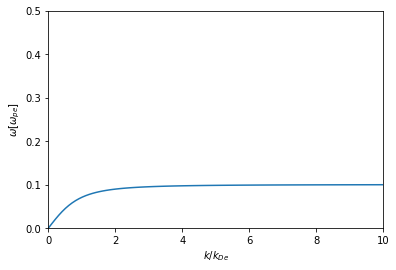

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def w(k):
    c_s = 0.1
    k_De = 1
    w = k*k_De*c_s/np.sqrt(1+(k)**2)
    return w

ks = np.linspace(0,10,100)
ws = w(ks)

plt.plot(ks,ws)
plt.xlabel('$k/k_{De}$')
plt.ylabel('$\omega [\omega_{pe}]$')
plt.ylim(0,0.5)
plt.xlim(0,10)

Notice a couple key aspects of the dispersion relation...

## Simulations using UPIC-ES

Now try running some simulations using the PIC code UPIC-ES.  We'll use the simulation to generate dispersion relations for a few different cases, and see how the results compare to our fluid theory.

$\textbf{Case 1:}$  
First, we'll run a case where the electrons are much hotter than the ions by setting $T_e/T_i = 10$.  Recalling what we learned in the introduction, we see that in this case $\bar{v}_e \approx 40 \sqrt{10}  \ \bar{v}_i$.  That is, the electron distribution is super flat compared to the ion distribution.  Run the cell below to see just how flat it is, before executing the cell below that to run the simulation.

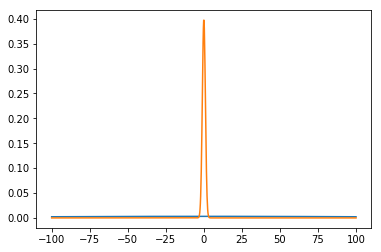

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def f_e(v):
    vbe = 40*np.sqrt(10)       # electron thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbe**2) * np.exp(-v**2/(2*vbe**2))
    return f

def f_i(v):
    vbi = 1      # ion thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbi**2) * np.exp(-v**2/(2*vbi**2))
    return f

vmax = 100
v = np.linspace(-vmax,vmax,1000)
f_e = f_e(v)
f_i = f_i(v)
plt.plot(v,f_e)
plt.plot(v,f_i)

In [ ]:
import sys                                    # comment out in main version
sys.path.insert(0, '/home/jovyan/analysis')   # comment out in main version
import osiris
# dirname = 'case1'
# osiris.run_upic_es(rundir=dirname, inputfile='case1.in')

Once the simulation is complete.  Execute the next cell to plot the dispersion function generated by the simulation.  

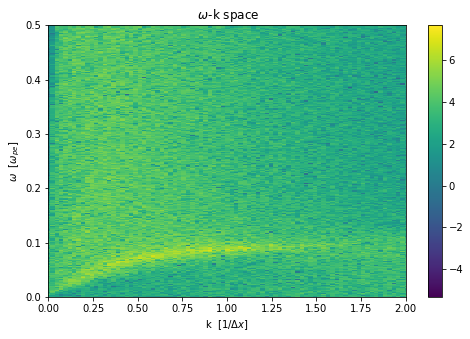

In [11]:
osiris.wk_upic_iaw(rundir='case1', field='Ex', wlim=[0,0.5], klim=[0,2], vtx=2.0, show_theory=False)

That looks strangely familiar.  Try plotting it again with the theory curve you generated before ploted on top by running the next cell.

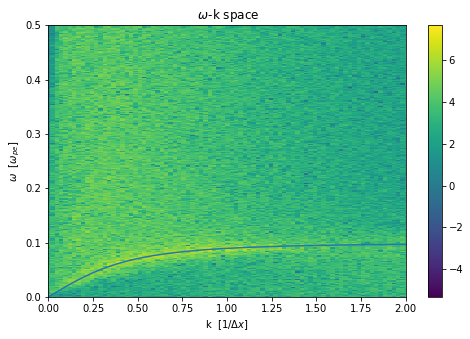

In [20]:
osiris.wk_upic_iaw(rundir='case1', field='Ex', wlim=[0,0.5], klim=[0,2], vtx=2.0, show_theory=True)

Amazing!  Seems like our fluid theory is doing a pretty great job.  Lets try changing up the parameters just to make sure it's really as great as we think it is.

$\textbf{Case 2:}$  
This time, we'll run a case where the electrons are bit colder compared to the electrons.  We'll set $T_e/T_i = 1.5$.  This time, then, we'll have $\bar{v}_e \approx 40 \sqrt{1.5}  \ \bar{v}_i$.  Plot the distribution functions for this case in the cell below.

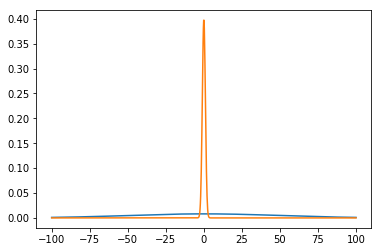

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def f_e(v):
    vbe = 40*np.sqrt(1.5)       # electron thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbe**2) * np.exp(-v**2/(2*vbe**2))
    return f

def f_i(v):
    vbi = 1      # ion thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbi**2) * np.exp(-v**2/(2*vbi**2))
    return f

vmax = 100
v = np.linspace(-vmax,vmax,1000)
f_e = f_e(v)
f_i = f_i(v)
plt.plot(v,f_e)
plt.plot(v,f_i)

The electron distribution is still pretty flat, but the hump is definitely now more noticeable. Guided by fluid theory, we expect that the sound speed, $c_s = \sqrt{ZT_e/M}$, will decrease as we decrease $T_e$.  Let's see if this is indeed the case by running the simulation.

In [ ]:
import sys                                    # comment out in main version
sys.path.insert(0, '/home/jovyan/analysis')   # comment out in main version
import osiris
# dirname = 'case2'
# osiris.run_upic_es(rundir=dirname, inputfile='case2.in')

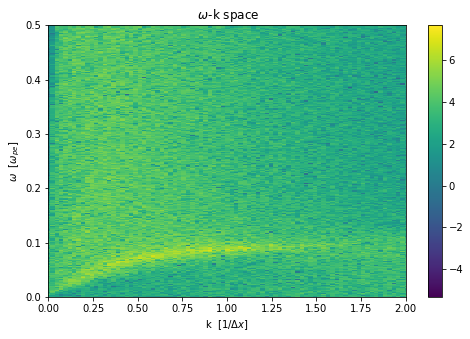

In [11]:
osiris.wk_upic_iaw(rundir='case2', field='Ex', wlim=[0,0.5], klim=[0,2], vtx=2.0, show_theory=False)